<a href="https://colab.research.google.com/github/Udbhavbisarya23/StockPrediction/blob/main/GCN_StockPrediction_T7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stellargraph
!pip install xlrd==1.2.0
!pip install openpyxl

     |████████████████████████████████| 435 kB 6.6 MB/s 
     |████████████████████████████████| 462 kB 9.0 MB/s 
     |████████████████████████████████| 103 kB 5.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


#Data Preparation



##Import drive and python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

##Import of corporation network

In [ ]:
corporation_network = pd.read_excel("/content/drive/MyDrive/Major_Project/Corporation_network_count7.xlsx","Sheet1")
print(corporation_network)

    Unnamed: 0  DOV  GPN  RL  AME  FTV  LEG  TSLA  BDX  WM  ...  AXP  MPC  \
0          DOV  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
1          GPN  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
2           RL  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
3          AME  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
4          FTV  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
..         ...  ...  ...  ..  ...  ...  ...   ...  ...  ..  ...  ...  ...   
498        PGR  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
499        IEX  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
500       AKAM  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
501        TGT  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   
502       ALGN  0.0  0.0   0    0    0    0   0.0    0   0  ...    0    0   

     CMCSA  HUM  IPG  PGR  IEX  AKAM  TGT  ALGN  
0      0.0  0.0    0  0.0

In [ ]:
stock_symbols=corporation_network.iloc[:,[0]].to_numpy()
companies=[]
for i in stock_symbols:
  companies.append(i[0])

##Preprocessing and import of feature matrix

In [ ]:
#This block is run to get details of timestamps (exact values for the Date column)
df = pd.read_excel('/content/drive/MyDrive/Major_Project/Trade_data.xls',sheet_name='AAPL')
dates=df.iloc[:,[0]].to_numpy()
timestamps=[]
for i in dates:
  timestamps.append(i[0])
date_to_index={}
for i in range(len(timestamps)):
  date_to_index[timestamps[i]]=i

In [ ]:
# Uncomment next line if creating the timestamp matrix again
# Node_matrix=pd.DataFrame(columns = timestamps, index = companies)

# Uncomment next line if loading the timestamp matrix
Node_matrix=pd.read_csv('/content/drive/MyDrive/Major_Project/Node_Matrix.csv')

Node_matrix.index=companies 
Node_matrix.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# This code removes stocks that dont have data available for each day
removed=[]
for stock in Node_matrix.index:
  for timestamp in Node_matrix.columns:
    if pd.isna(Node_matrix[timestamp][stock]):
      removed.append(stock)
      break

print(removed)
Node_matrix.drop(removed, inplace = True)

['PYPL', 'NVR', 'KEY', 'EXR', 'SYK', 'CERN', 'SCHW', 'ZBRA', 'JKHY', 'WU']


In [ ]:
Node_matrix = Node_matrix.iloc[:,1132:]
Node_matrix

,2021-07-02 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,...,2021-08-02 00:00:00,2021-08-03 00:00:00,2021-08-04 00:00:00,2021-08-05 00:00:00,2021-08-06 00:00:00,2021-08-09 00:00:00,2021-08-10 00:00:00,2021-08-11 00:00:00,2021-08-12 00:00:00,2021-08-13 00:00:00
DOV,148.110001,149.229996,149.589996,148.070007,149.490005,150.649994,149.110001,149.860001,148.339996,149.330002,...,154.050003,153.710007,153.960007,154.460007,154.759995,156.080002,156.919998,156.690002,156.509995,158.399994
GPN,21.620001,21.500000,20.790001,19.879999,20.790001,20.719999,20.690001,20.870001,20.559999,20.680000,...,20.490000,20.080000,19.520000,19.469999,21.129999,20.770000,20.500000,20.629999,21.030001,20.370001
RL,208.929993,210.399994,207.429993,206.869995,213.050003,212.440002,211.039993,210.050003,208.399994,210.130005,...,213.190002,213.100006,214.130005,210.679993,207.399994,205.080002,204.210007,209.210007,212.009995,209.649994
AME,137.899994,140.070007,143.539993,141.580002,142.750000,146.210007,144.029999,148.100006,149.240005,148.460007,...,146.360001,145.809998,147.270004,146.979996,146.350006,146.199997,146.440002,146.050003,146.190002,148.970001
FTV,114.519997,115.169998,115.910004,115.760002,116.300003,116.800003,117.589996,116.870003,116.809998,117.910004,...,116.889999,115.669998,115.779999,115.129997,115.260002,114.580002,114.199997,115.160004,113.959999,115.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGR,116.430000,117.440002,115.970001,116.699997,118.360001,118.029999,117.680000,117.209999,116.809998,117.339996,...,132.089996,132.630005,133.470001,133.990005,133.970001,133.910004,133.270004,133.389999,134.190002,133.419998
IEX,162.979996,162.850006,163.179993,159.479996,159.250000,158.750000,159.490005,157.449997,154.690002,153.460007,...,164.080002,152.990005,152.750000,148.210007,150.300003,149.000000,147.199997,146.830002,145.440002,146.000000
AKAM,537.010010,540.690002,546.450012,539.219971,542.469971,548.789978,546.359985,537.739990,528.859985,523.700012,...,555.000000,559.489990,547.559998,560.000000,565.059998,562.309998,565.000000,567.909973,568.969971,568.000000
TGT,53.500000,53.020000,50.990002,50.110001,51.169998,51.529999,52.549999,51.480000,50.720001,51.990002,...,52.349998,52.099998,51.939999,52.650002,54.029999,54.619999,54.029999,54.869999,56.180000,56.310001


In [ ]:
# companies_initial_values_map = {}

# def scale_data(data,company):
#     scaled = data.copy()
#     init_value = 0
#     for i in range(len(data)):
#       if i == 0:
#         scaled[0] = 1
#         init_value = data[0]
#         companies_initial_values_map[index] = init_value
#       else:      
#         scaled[i] = data[i]/data[0]
#     return scaled

# Node_matrix_scaled = Node_matrix
# for index,row in Node_matrix.iterrows():
#   Node_matrix_scaled.loc[index] = scale_data(Node_matrix.loc[index],index)


##Scaling Feature Matrix


In [ ]:
companies_min_max = {}

def scale_data(data,company):
    max_speed = data.max()
    min_speed = data.min()
    data_scaled = (data - min_speed) / (max_speed - min_speed)
    companies_min_max[company] = [max_speed, min_speed]
    return data_scaled

Node_matrix_scaled = Node_matrix
for index,row in Node_matrix.iterrows():
  Node_matrix_scaled.loc[index] = scale_data(Node_matrix.loc[index],index)
Node_matrix_scaled

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,2021-07-02 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,...,2021-08-02 00:00:00,2021-08-03 00:00:00,2021-08-04 00:00:00,2021-08-05 00:00:00,2021-08-06 00:00:00,2021-08-09 00:00:00,2021-08-10 00:00:00,2021-08-11 00:00:00,2021-08-12 00:00:00,2021-08-13 00:00:00
DOV,0.041899,0.146182,0.179702,0.038175,0.170391,0.278398,0.135009,0.204842,0.063314,0.155493,...,0.594973,0.563316,0.586593,0.633148,0.661080,0.783986,0.862198,0.840783,0.824022,1.000000
GPN,0.891374,0.853035,0.626199,0.335463,0.626199,0.603834,0.594250,0.651758,0.552716,0.591055,...,0.530352,0.399361,0.220448,0.204473,0.734824,0.619809,0.533546,0.575080,0.702876,0.492013
RL,0.401639,0.502049,0.299180,0.260928,0.683060,0.641393,0.545764,0.478142,0.365437,0.483607,...,0.692623,0.686476,0.756831,0.521174,0.297131,0.138661,0.079235,0.420765,0.612021,0.450819
AME,0.000000,0.191359,0.497354,0.324515,0.427690,0.732805,0.540564,0.899471,1.000000,0.931217,...,0.746032,0.697530,0.826279,0.800705,0.745150,0.731922,0.753086,0.718695,0.731041,0.976190
FTV,0.110453,0.238659,0.384616,0.355030,0.461539,0.560159,0.715976,0.573965,0.562130,0.779094,...,0.577909,0.337278,0.358974,0.230769,0.256411,0.122289,0.047337,0.236687,0.000000,0.366864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGR,0.124692,0.174470,0.102021,0.137999,0.219813,0.203548,0.186299,0.163134,0.143420,0.169541,...,0.896500,0.923115,0.964514,0.990143,0.989157,0.986200,0.954658,0.960572,1.000000,0.962050
IEX,0.940987,0.934013,0.951716,0.753219,0.740880,0.714056,0.753756,0.644313,0.496245,0.430258,...,1.000000,0.405043,0.392167,0.148605,0.260730,0.190987,0.094420,0.074571,0.000000,0.030043
AKAM,0.461772,0.523746,0.620748,0.498989,0.553722,0.660155,0.619232,0.474065,0.324520,0.237622,...,0.764736,0.840351,0.639441,0.848939,0.934153,0.887841,0.933143,0.982149,1.000000,0.983665
TGT,0.650497,0.590796,0.338309,0.228856,0.360696,0.405472,0.532338,0.399254,0.304726,0.462687,...,0.507462,0.476368,0.456467,0.544776,0.716418,0.789801,0.716418,0.820895,0.983831,1.000000


##Preprocessing of corporation network

In [ ]:
corporation_network.drop("Unnamed: 0", axis=1, inplace=True)
corporation_network.index=companies 
corporation_network

,DOV,GPN,RL,AME,FTV,LEG,TSLA,BDX,WM,LRCX,...,AXP,MPC,CMCSA,HUM,IPG,PGR,IEX,AKAM,TGT,ALGN
DOV,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
GPN,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
RL,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
AME,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
FTV,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGR,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
IEX,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
AKAM,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
TGT,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0


In [ ]:
corporation_network.drop(removed, inplace = True)

In [ ]:
corporation_network.drop(removed,axis=1, inplace = True)
corporation_network

,DOV,GPN,RL,AME,FTV,LEG,TSLA,BDX,WM,LRCX,...,AXP,MPC,CMCSA,HUM,IPG,PGR,IEX,AKAM,TGT,ALGN
DOV,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
GPN,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
RL,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
AME,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
FTV,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGR,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
IEX,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
AKAM,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
TGT,0.0,0.0,0,0,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0


In [ ]:
companies=corporation_network.index
stock_price_adj=corporation_network.to_numpy()
stock_price_adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Conversion of corporation network to networkx

In [ ]:
import networkx as nx

print(stock_price_adj)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Graph Info:
 Graph with 493 nodes and 580 edges

Graph Nodes:  [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {}), (10, {}), (11, {}), (12, {}), (13, {}), (14, {}), (15, {}), (16, {}), (17, {}), (18, {}), (19, {}), (20, {}), (21, {}), (22, {}), (23, {}), (24, {}), (25, {}), (26, {}), (27, {}), (28, {}), (29, {}), (30, {}), (31, {}), (32, {}), (33, {}), (34, {}), (35, {}), (36, {}), (37, {}), (38, {}), (39, {}), (40, {}), (41, {}), (42, {}), (43, {}), (44, {}), (45, {}), (46, {}), (47, {}), (48, {}), (49, {}), (50, {}), (51, {}), (52, {}), (53, {}), (54, {}), (55, {}), (56, {}), (57, {}), (58, {}), (59, {}), (60, {}), (61, {}), (62, {}), (63, {}), (64, {}), (65, {}), (66, {}), (67, {}), (68, {}), (69, {}), (70, {}), (71, {}), (72, {}), (73, {}), (74, {}), (75, {}), (76, {}), (77, {}), (78, {}), (79, {}), (80, {}), (81, {}), (82, {}), (83, {}), (84, {}), (85, {}), (86, {}), (87, {}), (88, {}), (89, {}), (90, {}), (91, {}), (92, {}), (93, {}), (94, {

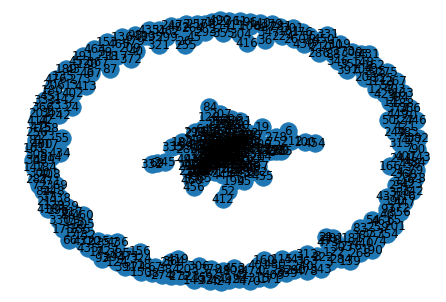

In [ ]:
# Creation of network 
G = nx.from_numpy_matrix(stock_price_adj)

print('Graph Info:\n', nx.info(G))

#Inspect the node features
print('\nGraph Nodes: ', G.nodes.data())

#Plot the graph
nx.draw(G, with_labels=True)
plt.show()


#GCN

##Installing Pytorch-geometric


In [ ]:
# Check CUDA Version
!python -c "import torch; print(torch.version.cuda)"

11.1


In [ ]:
# Install Pytorch Geometric
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

use_cuda_if_available = False

     |████████████████████████████████| 7.9 MB 4.6 MB/s 
     |████████████████████████████████| 3.5 MB 5.2 MB/s 


##Creating custom dataset in pytorch geometric (Check from here)

---



In [ ]:
import torch
from torch_geometric.data import Dataset, Data

import os.path as osp


class StockDataset(Dataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return ['Corporation_network_count7.xlsx', 'Node_matrix.xls', ]

    @property
    def processed_file_names(self):
        return 'data_.pt'

    def download(self):
        # Download to `self.raw_dir`.
        pass
        ...

    def process(self):
        idx = 0
        self.companies = corporation_network.index
        self.node_features = torch.tensor(Node_matrix_scaled.to_numpy(),dtype=torch.float)
        self.edge_index = self.get_adjacency_matrix()
        self.edge_features = torch.tensor(self.edge_features,dtype = torch.float)
        self.y = torch.tensor(Node_matrix_scaled['2021-08-13 00:00:00'],dtype=torch.float)
        print(self.node_features)
        print(self.edge_index)
        print(self.edge_features)
        print(self.y)

        data = Data(x = self.node_features, 
                    edge_attr = self.edge_features,
                    edge_index=self.edge_index,
                    y=self.y)

        torch.save(data, osp.join(self.processed_dir, f'data_1.pt'))

    def get_adjacency_matrix(self):
        adj_matrix = stock_price_adj
        row,col = 493,493
        coo = np.zeros((2,G.number_of_edges()))
        self.edge_features = []
        ind = 0
        for i in range(row):
          for j in range(col):
            if j> i and stock_price_adj[i][j] > 0:
              coo[0][ind] = i
              coo[1][ind] = j
              ind += 1
              self.edge_features.append(stock_price_adj[i][j])
      
        return torch.tensor(coo,dtype=torch.long)
    
    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_1.pt'))
        return data

###Creating transform


In [ ]:
import torch_geometric.transforms as T
# transform = T.Compose([
#     T.RandomNodeSplit('train_rest', num_val=50, num_test=100),
#     T.TargetIndegree(),
# ])
dataset = StockDataset('/content/drive/MyDrive/Major_Project/')

Processing...


tensor([[0.0419, 0.1462, 0.1797,  ..., 0.8408, 0.8240, 1.0000],
        [0.8914, 0.8530, 0.6262,  ..., 0.5751, 0.7029, 0.4920],
        [0.4016, 0.5020, 0.2992,  ..., 0.4208, 0.6120, 0.4508],
        ...,
        [0.4618, 0.5237, 0.6207,  ..., 0.9821, 1.0000, 0.9837],
        [0.6505, 0.5908, 0.3383,  ..., 0.8209, 0.9838, 1.0000],
        [0.0000, 0.1214, 0.3726,  ..., 0.6008, 0.5324, 0.7425]])
tensor([[  0,   1,   1,  ..., 425, 425, 485],
        [401,  16,  60,  ..., 443, 445, 486]])
tensor([0.3658, 0.4193, 0.3866, 1.0000, 0.2926, 0.3744, 0.3774, 0.3048, 0.2986,
        0.3269, 0.3397, 0.3496, 0.3072, 0.3477, 0.2955, 0.4334, 0.4096, 0.3488,
        0.3903, 0.3509, 1.0000, 1.0000, 0.3591, 0.3799, 0.4098, 0.3353, 0.3718,
        0.3585, 0.3533, 1.0000, 0.4145, 0.4050, 1.0000, 0.4688, 0.4094, 0.3556,
        0.4376, 0.3648, 0.2947, 0.3064, 0.3387, 0.3449, 0.3465, 0.2773, 0.2024,
        0.2676, 0.2644, 0.2655, 0.2617, 0.2677, 0.2755, 0.2673, 1.0000, 0.3218,
        0.2855, 1.0000, 0.305

Done!


In [ ]:
dataset.get(0)

Data(x=[493, 30], edge_index=[2, 580], edge_attr=[580], y=[493])

In [ ]:
nodesplit = T.RandomNodeSplit('train_rest', num_val=20, num_test=50)
data = nodesplit(dataset.get(0))
print(data.y[data.train_mask])

tensor([1.0000, 0.4920, 0.4508, 0.9762, 0.3669, 0.5628, 0.9053, 1.0000, 0.9894,
        0.7163, 1.0000, 0.9009, 1.0000, 0.9744, 1.0000, 1.0000, 0.9925, 1.0000,
        0.9076, 0.7175, 0.9725, 0.6325, 0.9633, 0.3943, 0.6631, 0.0458, 1.0000,
        0.0345, 0.3446, 0.6377, 0.0702, 1.0000, 0.7396, 0.4247, 0.1552, 1.0000,
        0.9133, 0.8390, 0.8043, 0.6058, 0.7098, 0.9130, 0.9062, 0.3790, 0.7665,
        0.9376, 0.9745, 0.0000, 0.6959, 0.9125, 0.4166, 0.9398, 0.3917, 0.9829,
        0.9930, 0.7062, 0.4749, 0.9731, 1.0000, 0.2040, 0.9201, 0.5852, 0.3326,
        0.9858, 0.3465, 0.1707, 1.0000, 1.0000, 0.8241, 0.2504, 0.5474, 1.0000,
        0.8113, 0.9731, 0.5319, 0.8631, 0.1029, 0.6112, 0.9721, 0.1346, 1.0000,
        0.0326, 0.1813, 1.0000, 0.3058, 0.9099, 0.7391, 0.9155, 1.0000, 1.0000,
        1.0000, 0.3765, 0.1483, 0.4864, 0.9218, 1.0000, 1.0000, 0.7354, 0.8051,
        1.0000, 0.2996, 1.0000, 0.6315, 0.4825, 1.0000, 0.3377, 0.7287, 1.0000,
        1.0000, 0.9217, 0.9522, 1.0000, 

In [ ]:
# Dataset statistics

print(dataset)
print("number of graphs:\t\t",len(dataset))
print("number of node features:\t",dataset.num_node_features)
print("number of edge features:\t",dataset.num_edge_features)

StockDataset(8)
number of graphs:		 8
number of node features:	 30
number of edge features:	 1


In [ ]:
print(dataset[0].edge_index)

tensor([[  0,   1,   1,  ..., 425, 425, 485],
        [401,  16,  60,  ..., 443, 445, 486]])


##Training Graph Neural Network

In [ ]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 423)
        self.linear1 = torch.nn.Linear(423,1)

    def forward(self, x, edge_index, edge_attr):
        x = self.conv1(x, edge_index, edge_attr)
        x = x.sigmoid()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index, edge_attr)
        x = self.linear1(x)
        return x


In [ ]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

tensor([[-0.1044],
        [-0.1232],
        [-0.1177],
        [-0.1005],
        [-0.1035],
        [-0.1047],
        [-0.1081],
        [-0.1038],
        [-0.0968],
        [-0.0991],
        [-0.1067],
        [-0.1144],
        [-0.1043],
        [-0.1027],
        [-0.1014],
        [-0.0927],
        [-0.1252],
        [-0.1033],
        [-0.1117],
        [-0.1082],
        [-0.1042],
        [-0.1042],
        [-0.1054],
        [-0.0994],
        [-0.1204],
        [-0.1171],
        [-0.1165],
        [-0.1078],
        [-0.1031],
        [-0.1008],
        [-0.1075],
        [-0.1103],
        [-0.0956],
        [-0.1168],
        [-0.1097],
        [-0.1094],
        [-0.1002],
        [-0.1045],
        [-0.1132],
        [-0.1213],
        [-0.1044],
        [-0.1013],
        [-0.1046],
        [-0.0994],
        [-0.0997],
        [-0.1186],
        [-0.0926],
        [-0.1200],
        [-0.1057],
        [-0.0964],
        [-0.1096],
        [-0.0969],
        [-0.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


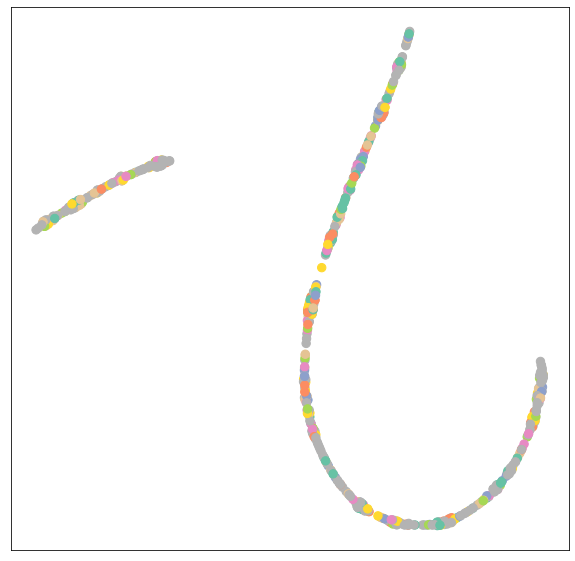

In [ ]:
model = GCN(hidden_channels=800)
model.eval()

out = model(data.x, data.edge_index, data.edge_attr)
print(out)
visualize(out, color=data.y)

In [ ]:
# def softXEnt (input, target):
#   return  -(target * input).sum() / input.shape[0]

In [ ]:
# from IPython.display import Javascript  # Restrict height of output cell.
# display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

# model = GCN(hidden_channels=16)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()

# def train():
#       model.train()
#       optimizer.zero_grad()  # Clear gradients.
#       out = model(data.x, data.edge_index)  # Perform a single forward pass.
#       loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
#       loss.backward()  # Derive gradients.
#       optimizer.step()  # Update parameters based on gradients.
#       return loss

# def test():
#       model.eval()
#       out = model(data.x, data.edge_index)
#       pred = out.argmax(dim=1)  # Use the class with highest probability.
#       test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
#       test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
#       return test_acc


# for epoch in range(1, 101):
#     loss = train()
#     print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

In [ ]:

from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=5e-4)
alt_optimizer = torch.optim.LBFGS(model.parameters(), lr=0.0005, max_iter=40)
criterion = torch.nn.MSELoss(reduction='mean')

def rmse(predictions, targets, test_mask):
      sum = 0
      count = 0
      act_pred_array = []
      act_target_array = [compile]
      for i in range(len(predictions)):
        [max,min] = companies_min_max[companies[data.test_mask[i]]]
        act_pred = predictions[i] * (max - min) + min
        act_target = targets[i] * (max - min) + min
        
        act_pred_array.append(act_pred)
        act_target_array.append(act_target)

        sum += (act_pred - act_target) ** 2
        count += 1
      

      print(act_pred_array)
      print(act_target_array)
      return np.sqrt(float(sum)/count)     


def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index, data.edge_attr)  # Perform a single forward pass.

      loss = torch.nn.functional.mse_loss(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index, data.edge_attr)
      pred = out # Use the class with highest probability.
      print(pred[data.test_mask])
      print(data.y[data.test_mask])
      test_correct = rmse(pred[data.test_mask].detach().numpy(),data.y[data.test_mask].detach().numpy(),data.test_mask)  # Check against ground-truth labels.
      #test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_correct


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Using a target size (torch.Size([423])) that is different to the input size (torch.Size([423, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch: 001, Loss: 0.8509
Epoch: 002, Loss: 2.5658
Epoch: 003, Loss: 0.7411
Epoch: 004, Loss: 0.4058
Epoch: 005, Loss: 1.2152
Epoch: 006, Loss: 0.9463
Epoch: 007, Loss: 0.3411
Epoch: 008, Loss: 0.2653
Epoch: 009, Loss: 0.6480
Epoch: 010, Loss: 0.7527
Epoch: 011, Loss: 0.4589
Epoch: 012, Loss: 0.2188
Epoch: 013, Loss: 0.2868
Epoch: 014, Loss: 0.4549
Epoch: 015, Loss: 0.5705
Epoch: 016, Loss: 0.3661
Epoch: 017, Loss: 0.2072
Epoch: 018, Loss: 0.2516
Epoch: 019, Loss: 0.4175
Epoch: 020, Loss: 0.4342
Epoch: 021, Loss: 0.2935
Epoch: 022, Loss: 0.1956
Epoch: 023, Loss: 0.2246
Epoch: 024, Loss: 0.3352
Epoch: 025, Loss: 0.3057
Epoch: 026, Loss: 0.2508
Epoch: 027, Loss: 0.1982
Epoch: 028, Loss: 0.2068
Epoch: 029, Loss: 0.2594
Epoch: 030, Loss: 0.2792
Epoch: 031, Loss: 0.2299
Epoch: 032, Loss: 0.1841
Epoch: 033, Loss: 0.1921
Epoch: 034, Loss: 0.2245
Epoch: 035, Loss: 0.2358
Epoch: 036, Loss: 0.1985
Epoch: 037, Loss: 0.1897
Epoch: 038, Loss: 0.1883
Epoch: 039, Loss: 0.2141
Epoch: 040, Loss: 0.2029


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


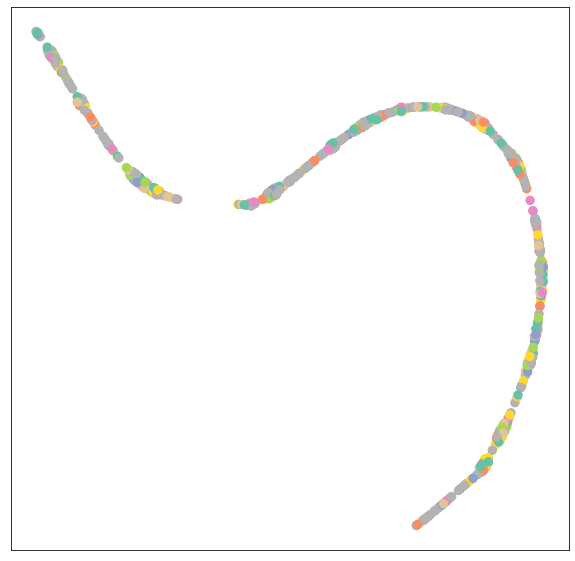

In [ ]:
model.eval()

out = model(data.x, data.edge_index, data.edge_attr)
visualize(out, color=data.y)

In [ ]:
rmse = test()
print("Root mean square error is: ",rmse)

tensor([[0.6700],
        [0.6590],
        [0.6712],
        [0.6641],
        [0.6655],
        [0.6633],
        [0.6673],
        [0.6640],
        [0.6649],
        [0.6024],
        [0.6523],
        [0.6721],
        [0.6619],
        [0.6629],
        [0.9069],
        [0.6693],
        [0.6606],
        [0.6643],
        [0.6730],
        [0.6654],
        [0.6651],
        [0.6597],
        [0.6667],
        [0.6635],
        [0.6656],
        [0.6690],
        [0.6646],
        [1.1378],
        [0.6591],
        [0.6716],
        [0.6686],
        [0.6609],
        [0.6610],
        [0.6630],
        [0.6689],
        [0.9238],
        [0.6689],
        [0.6648],
        [0.8850],
        [0.6767],
        [0.6662],
        [0.6324],
        [0.6114],
        [0.7118],
        [0.6695],
        [0.8065],
        [0.6654],
        [0.6723],
        [0.8766],
        [0.6609]], grad_fn=<IndexBackward0>)
tensor([0.9118, 0.2153, 0.7010, 0.4167, 0.8267, 0.8818, 0.4798, 1.0000, 0